In [1]:
from feast import FeatureStore
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from joblib import dump
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Getting our FeatureStore
store = FeatureStore(repo_path=".")

In [3]:
# Retrieving the saved dataset and converting it to a DataFrame
training_df = store.get_saved_dataset(name="churn_dataset").to_df()

C:\Users\damia\AppData\Roaming\Python\Python311\site-packages\feast\feature_store.py:1178: RuntimeWarning: Retrieving datasets is an experimental feature. This API is unstable and it could and most probably will be changed in the future. We do not guarantee that future changes will maintain backward compatibility.
  warnings.warn(


In [4]:
training_df

,HasCrCard,Geography_France,Geography_Germany,Gender,NumOfProducts,Geography_Spain,event_timestamp,IsActiveMember,Age,Exited,CreditScore,USER_ID,Balance,EstimatedSalary,Tenure
0,0,False,False,1,2,True,2023-01-01 00:00:00+00:00,0,39,0,629,4523,0.00,116748.14,5
1,1,True,False,0,3,False,2023-01-01 00:00:00+00:00,0,45,1,513,6222,164649.52,49915.52,0
2,0,False,True,1,1,False,2023-01-01 00:00:00+00:00,0,36,0,757,9922,65349.71,64539.64,1
3,0,True,False,1,1,False,2023-01-01 00:00:00+00:00,1,48,1,515,9514,129387.94,147955.91,5
4,0,False,False,1,2,True,2023-01-01 00:00:00+00:00,0,35,0,643,7767,0.00,67979.35,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,False,False,1,1,True,2023-12-31 00:00:00+00:00,1,23,0,784,9944,0.00,6847.73,2
9996,1,True,False,0,1,False,2023-12-31 00:00:00+00:00,1,31,1,670,5183,57530.06,181893.31,2
9997,1,True,False,0,1,False,2023-12-31 00:00:00+00:00,0,45,1,747,3007,114959.12,189362.39,1
9998,0,False,False,1,2,True,2023-12-31 00:00:00+00:00,1,41,0,650,271,0.00,191599.67,9


In [5]:
# Separating the features and labels
labels = training_df['Exited']
features = training_df.drop(
    labels=['Exited', 'event_timestamp', "USER_ID"],
    axis=1)

In [6]:
# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features,
                                                    labels,
                                                    stratify=labels)

### Train 1 - Random Forest Classifier

In [7]:
# Inizializza il modello
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Addestra il modello
model.fit(X=X_train, y=y_train)

RandomForestClassifier(random_state=42)

In [8]:
dump(model, "random_forest_model.pkl")

['random_forest_model.pkl']

### Train 2 - Logistic Regression Classifier

In [9]:
# Define the hyperparameter grid
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 200, 300]
}

In [10]:
# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to your data
grid_search.fit(X=X_train, y=y_train)

C:\Users\damia\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\damia\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\damia\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\damia\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\damia\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\damia\

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10, 100], 'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [11]:
# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best Parameters: ", best_params)
print("Best Estimator: ", best_estimator)

Best Parameters:  {'C': 10, 'max_iter': 300, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Estimator:  LogisticRegression(C=10, max_iter=300)


In [12]:
# Make predictions and evaluate your model
y_pred = best_estimator.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy: ", accuracy)

Test Accuracy:  0.8072


In [13]:
# Saving the model
dump(value=grid_search, filename="model_2.joblib")

['model_2.joblib']

### Confronto tra i due modelli

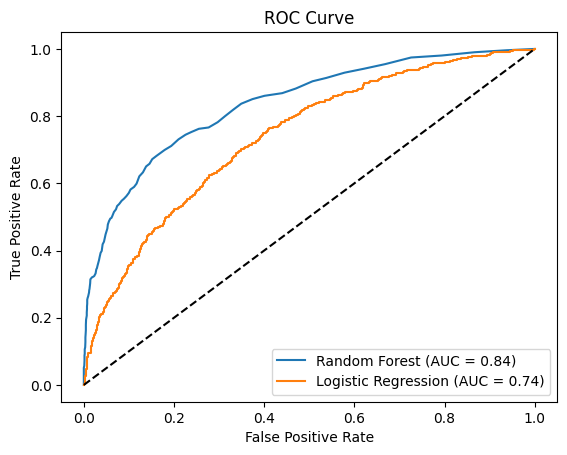

In [14]:
# Calcoliamo le probabilità predette per la classe positiva su enrambi i modelli (con e senza PCA)
y_pred_prob_1 = model.predict_proba(X_test)[:, 1]
y_pred_prob_2 = grid_search.predict_proba(X_test)[:,-1]

# Calcoliamo la curva ROC e l'AUC relativo all'albero senza PCA appena addestrato
fpr_1, tpr_1, thresholds_1 = roc_curve(y_test, y_pred_prob_1)
auc_1 = roc_auc_score(y_test, y_pred_prob_1)

# Calcoliamo la curva ROC e l'AUC relativo all'albero con PCA appena addestrato
fpr_2, tpr_2, thresholds_2 = roc_curve(y_test, y_pred_prob_2)
auc_2 = roc_auc_score(y_test, y_pred_prob_2)

# Plottiamo la curva ROC dei due modelli (alberi con e senza PCA) per comparare le performance
plt.plot(fpr_1, tpr_1, label=f'Random Forest (AUC = {auc_1:.2f})')
plt.plot(fpr_2, tpr_2, label=f'Logistic Regression (AUC = {auc_2:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()